##### Model Evaluation + Tuning

###### Confusion Matrix Plot

In [2]:
import pandas as pd
df=pd.read_csv(r"C:/Users/HP/PCOD-DETECTION/data/processed/Day5-preprocessed.csv")

In [3]:
df.head()

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),BMI,Hair loss(Y/N),Waist(inch),Hip(inch),Avg. F size (L) (mm),PCOS (Y/N)
0,-0.821501,-0.741039,-0.666221,-0.614452,-0.779194,-0.622331,0.967204,-0.978019,-0.604849,-1.364256,-1.234925,-0.911322,-1.068363,-0.503842,0.837271,0
1,-0.370677,-0.741039,-0.666221,-0.614452,-0.779194,-0.622331,-1.033908,-0.978019,-0.696746,0.485719,0.146043,-0.911322,-0.512299,0.000467,-0.004051,0
2,1.883440,1.623978,-0.666221,-0.614452,-0.779194,-0.622331,0.967204,1.022475,0.171168,0.830323,0.244683,1.097307,0.599828,0.504776,0.837271,1
3,-1.046912,-0.977540,-0.666221,-0.614452,-0.779194,-0.622331,-1.033908,-0.978019,-0.749502,0.485719,1.329730,-0.911322,0.599828,1.009084,-0.004051,0
4,-0.596089,-0.741039,-0.666221,-0.614452,-0.779194,-0.622331,-1.033908,-0.978019,-0.572515,-0.693187,-1.037644,1.097307,-1.068363,-0.251687,0.276390,0


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Split data
X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Base model
rfc = RandomForestClassifier(random_state=42)

# Reduced grid for quick tuning
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_rfc_quick = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


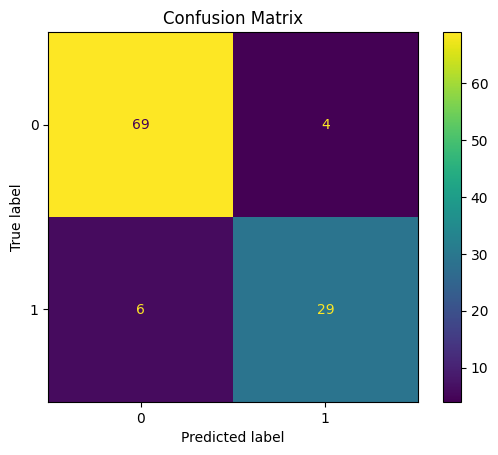

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(best_rfc_quick,X_test,y_test)
plt.title("Confusion Matrix")
plt.show()

###### ROC Curve Plot

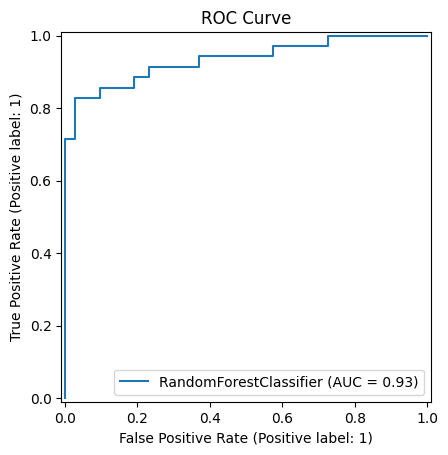

In [7]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_rfc_quick,X_test,y_test)
plt.title("ROC Curve")
plt.show()

###### SMOTE + XGBoost on Your PCOD Dataset

In [9]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/238.4 kB ? eta -:--:--
   ---------- ---------------------------- 61.4/238.4 kB 812.7 kB/s eta 0:00:01
   -------------------- ------------------- 122.9/238.4 kB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 122.9/238.4 kB 1.0 MB/s eta 0:00:01
   ----------------------------- -------- 184.3/238.4 kB 857.5 kB/s eta 0:00:01
   -------------------------------------- 238.4/238.4 kB 970.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from imblearn.over_sampling import SMOTE


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:10:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[68  5]
 [ 6 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        73
           1       0.85      0.83      0.84        35

    accuracy                           0.90       108
   macro avg       0.89      0.88      0.88       108
weighted avg       0.90      0.90      0.90       108


ROC AUC Score: 0.95


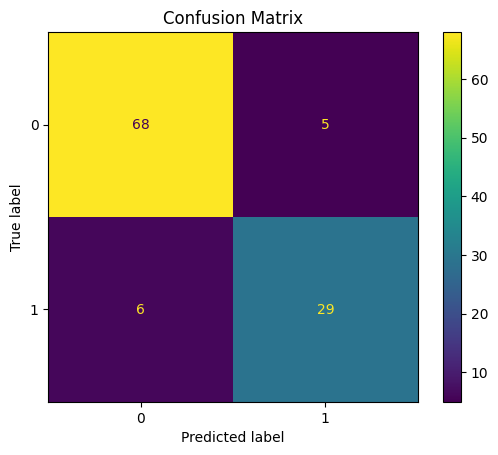

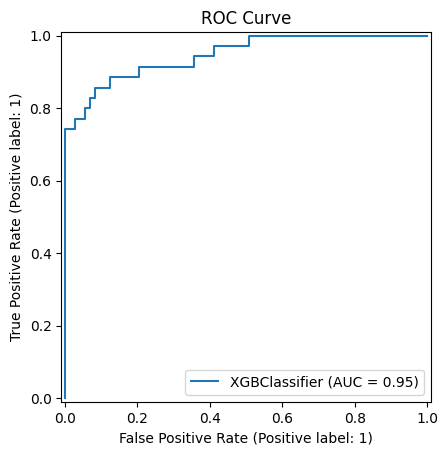

In [13]:
# 📌 Step 0: Import all libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# 📌 Step 1: Load your preprocessed dataset
df = pd.read_csv(r"C:/Users/HP/PCOD-DETECTION/data/processed/Day5-preprocessed.csv")  # Adjust path if needed

# 📌 Step 2: Split features and target
X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

# 📌 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📌 Step 4: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 📌 Step 5: Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# 📌 Step 6: Predict and evaluate
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {auc_score:.2f}")

# 📊 Step 7: Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# 📈 Step 8: Plot ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()
